In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output


In [3]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images_from_folder(file_paths, format='rgb'):
    rows = 2
    cols = 5
    plt.figure(figsize=(30, 8))  
        
    for i, image_file in enumerate(file_paths):
        img = cv2.imread(image_file)
        if format == 'rgb':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        elif format == 'gray':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        elif format == 'bgr':
            pass
        elif format == 'hsv':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif format == 'luv':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
        elif format == 'lab':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
        elif format == 'YCrCb':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        else:
            raise ValueError("Unsupported format. Use 'rgb', 'bgr', 'gray', 'hsv', 'lab', or 'YCrCb'.")
            
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')  
        
    plt.tight_layout()
    plt.show()
    

def get_image_channels(file_paths, format='rgb'):
    outputs = []

    for image_file in file_paths:
        img = cv2.imread(image_file)
        if img is None:
            continue

        if format == 'rgb':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            channels = {'R': img[:, :, 0],
                        'G': img[:, :, 1],
                        'B': img[:, :, 2]}

        elif format == 'bgr':
            channels = {'B': img[:, :, 0],
                        'G': img[:, :, 1],
                        'R': img[:, :, 2]}

        elif format == 'gray':
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            channels = {'Gray': gray}

        elif format == 'hsv':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            channels = {'H': img[:, :, 0],
                        'S': img[:, :, 1],
                        'V': img[:, :, 2]}

        elif format == 'lab':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
            channels = {'L': img[:, :, 0],
                        'A': img[:, :, 1],
                        'B': img[:, :, 2]}

        elif format == 'luv':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
            channels = {'L': img[:, :, 0],
                        'U': img[:, :, 1],
                        'V': img[:, :, 2]}

        elif format == 'YCrCb':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
            channels = {'Y': img[:, :, 0],
                        'Cr': img[:, :, 1],
                        'Cb': img[:, :, 2]}

        else:
            raise ValueError("Unsupported format")

        outputs.append({
            'path': image_file,
            'channels': channels
        })

    return outputs
    
folder_path = "/Users/mohammadbilal/Documents/Projects/GateDetection/assets/test_files/test_images"
image_files = [f for f in os.listdir(folder_path) if f.endswith((".png", ".jpg", ".jpeg"))]

file_paths = []
for f in image_files:
    img_path = os.path.join(folder_path, f)
    file_paths.append(img_path)


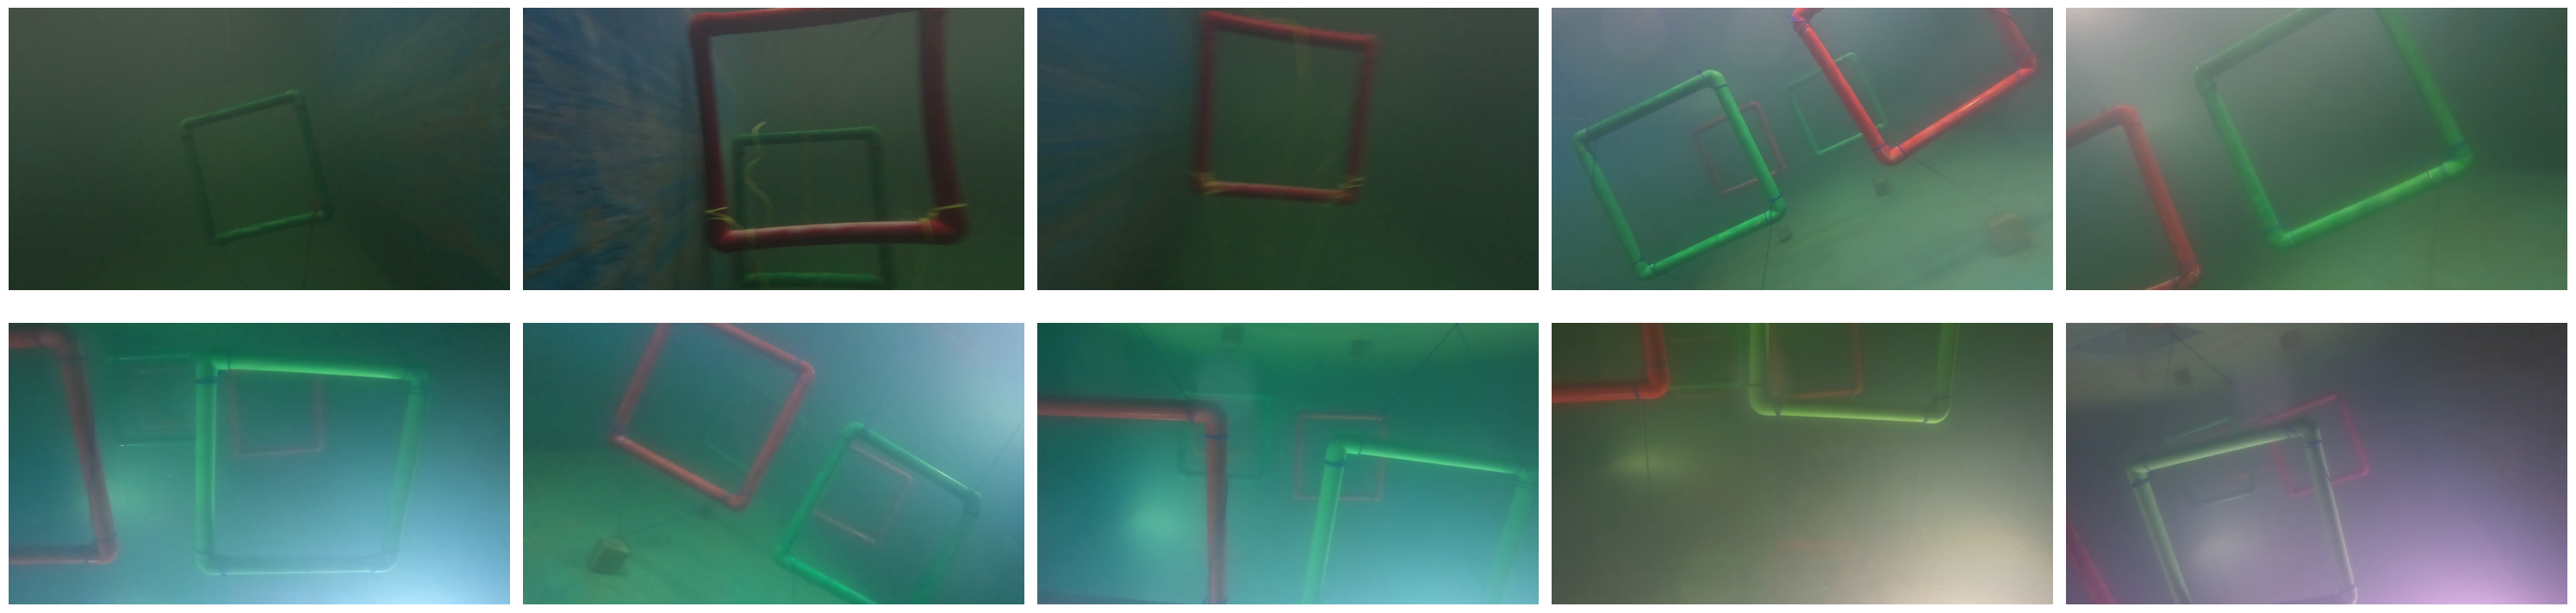

In [33]:
display_images_from_folder(file_paths, format='rgb')

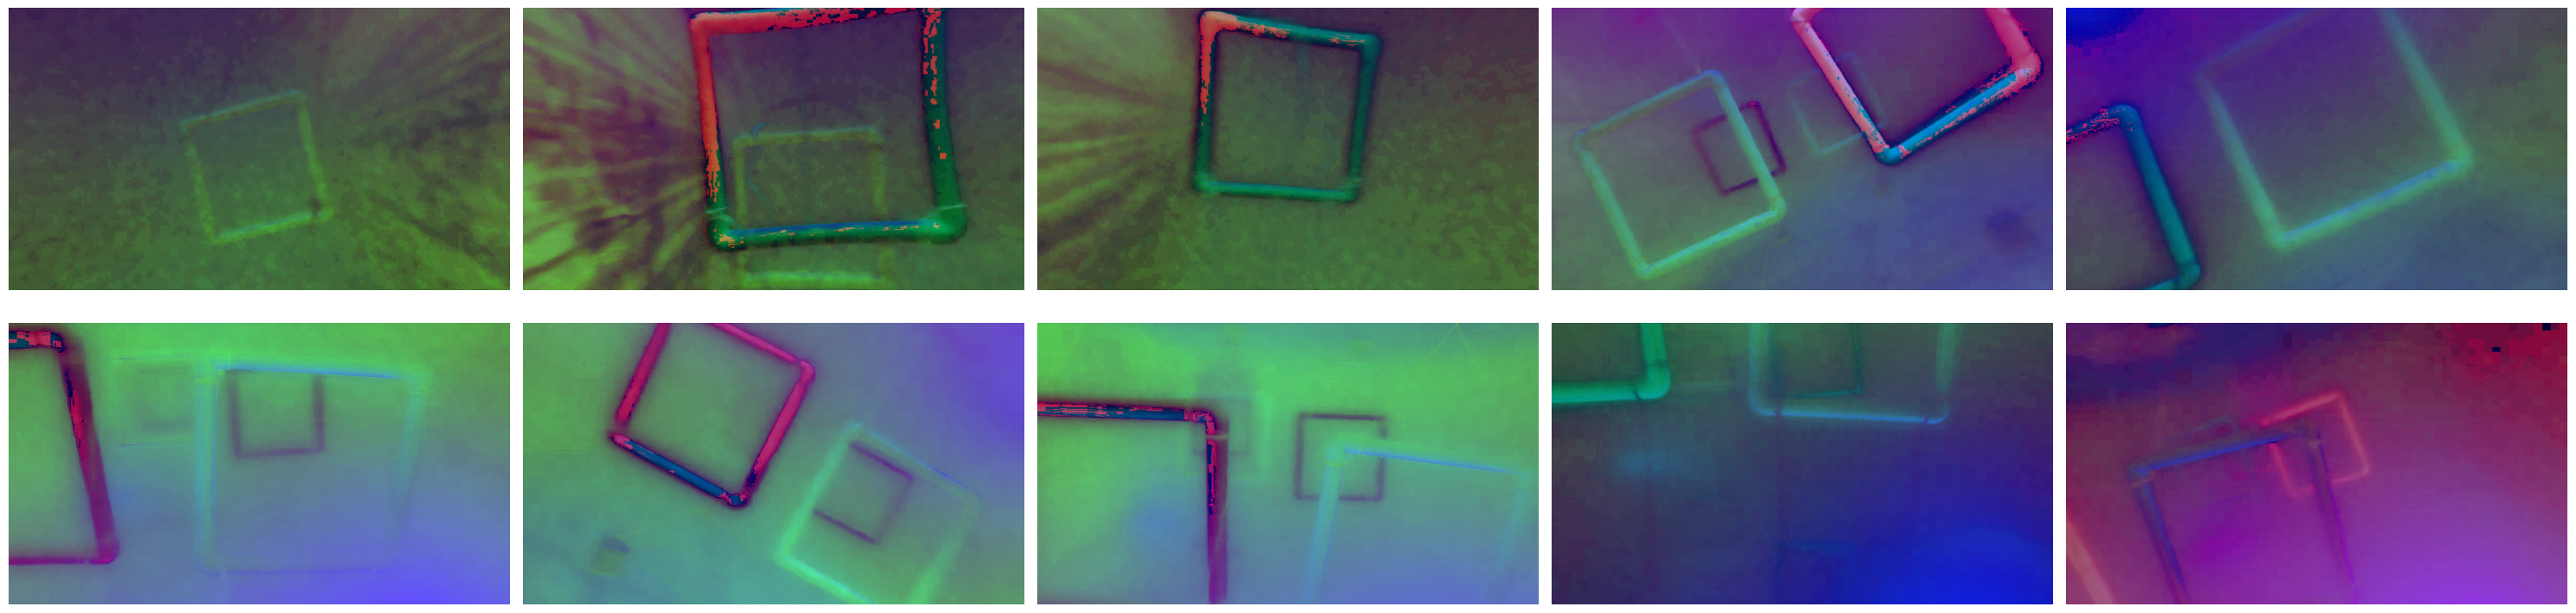

In [18]:
display_images_from_folder(file_paths, format='hsv')

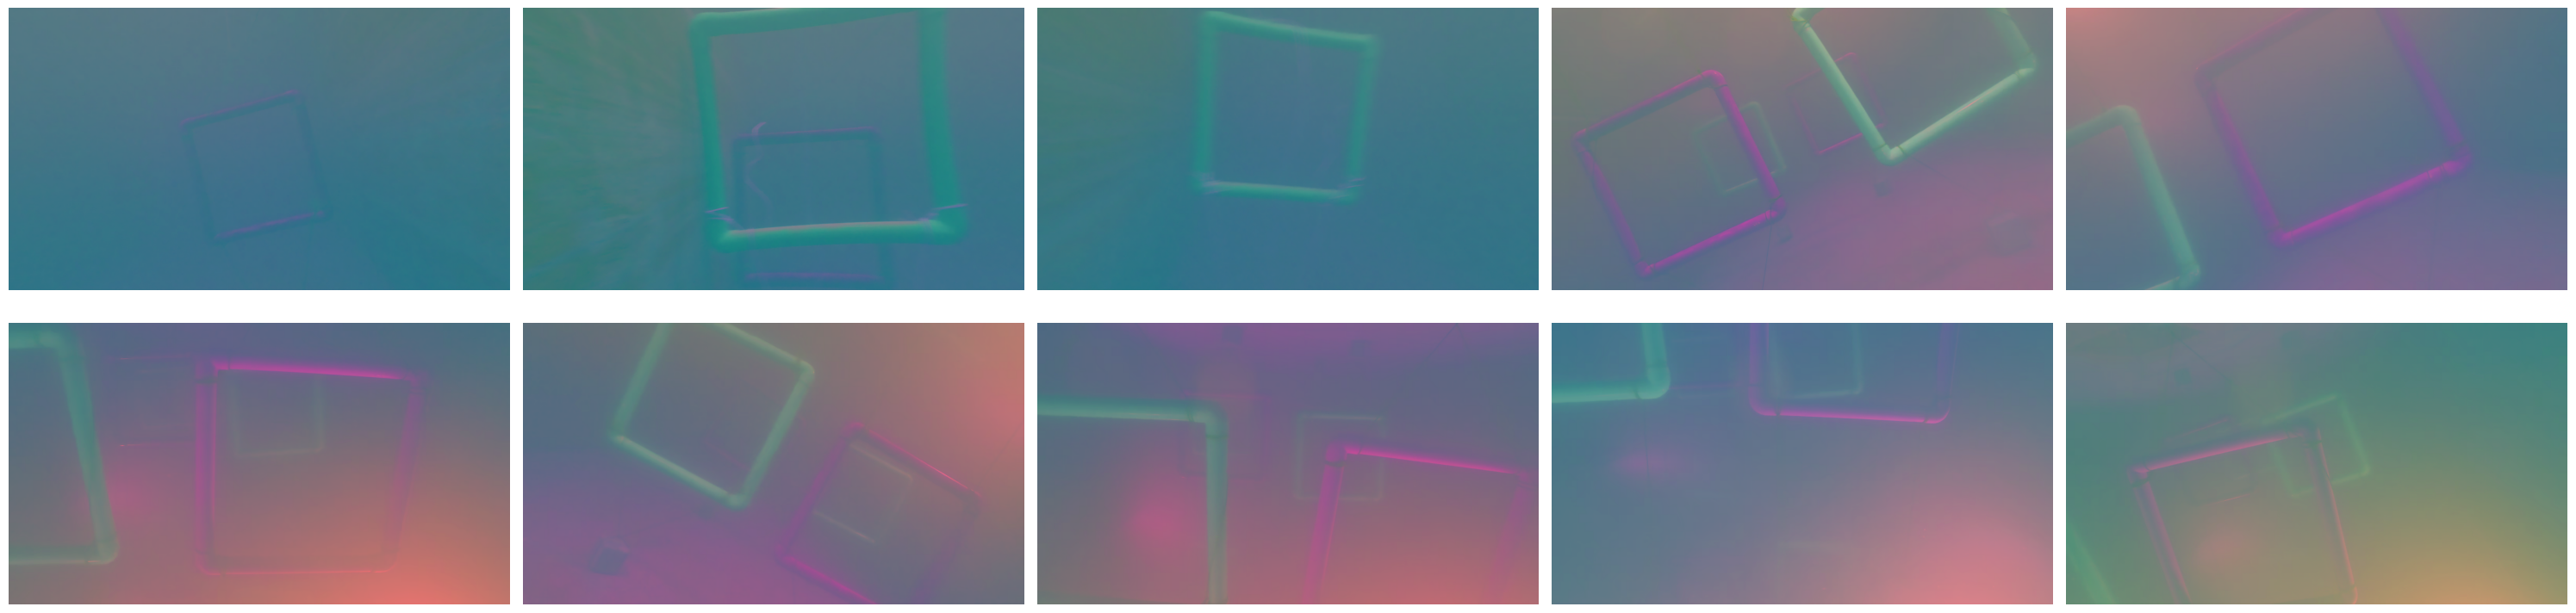

In [34]:
display_images_from_folder(file_paths, format='lab')

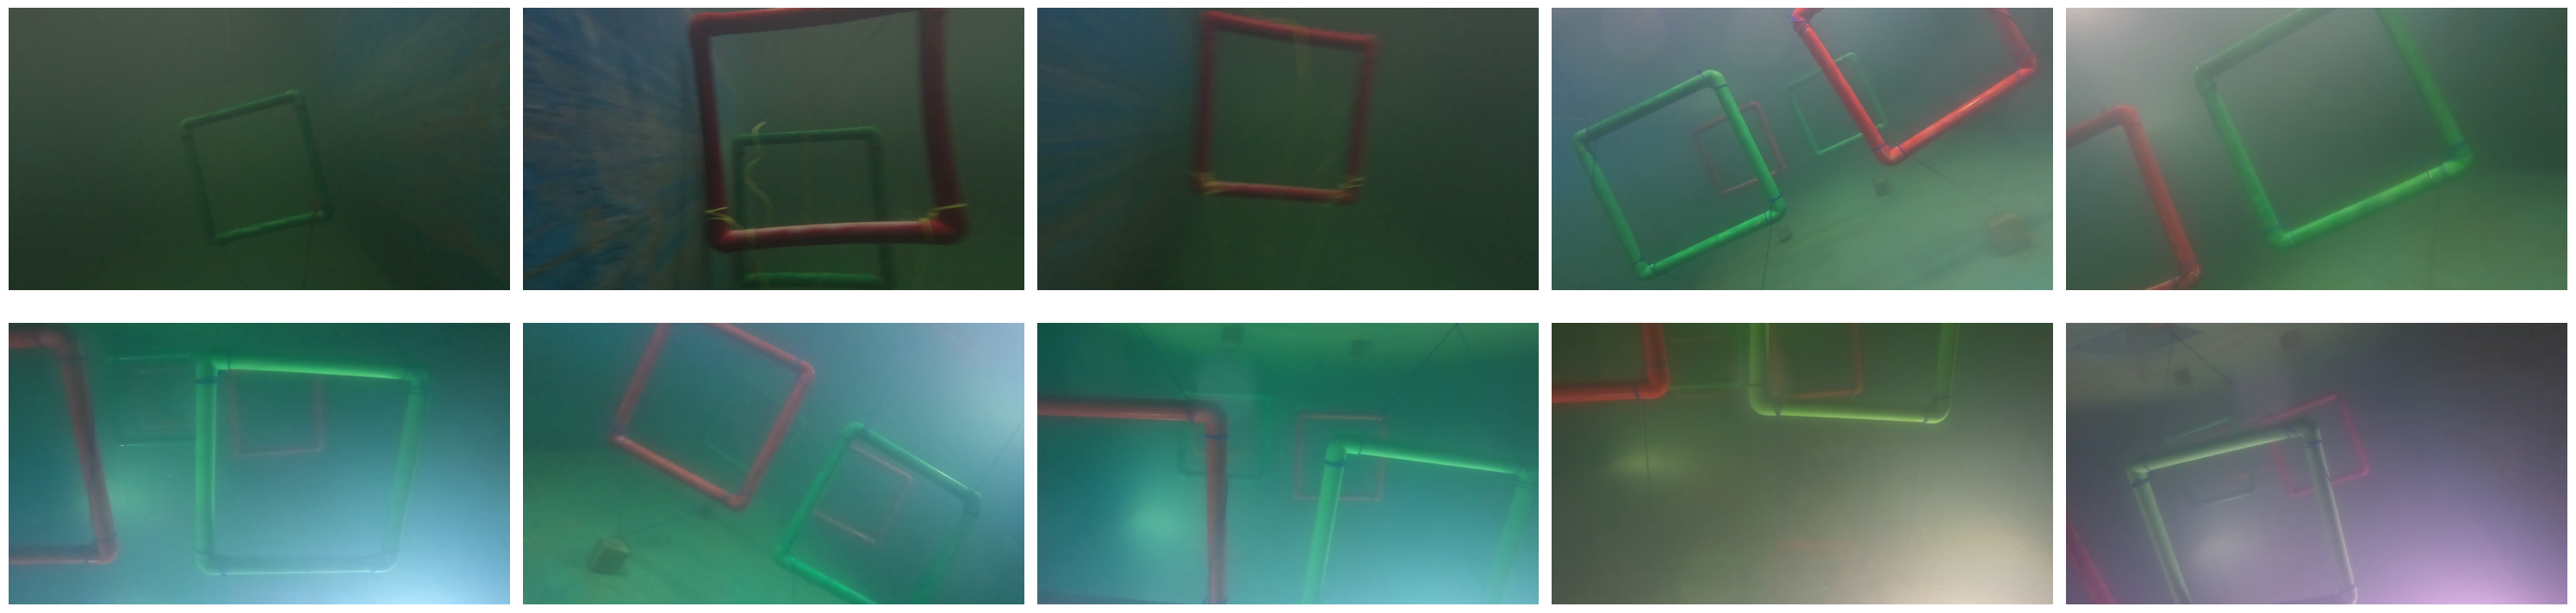

interactive(children=(FloatSlider(value=1.0, description='L_w', max=1.5, step=0.01), FloatSlider(value=1.5, de…

<function __main__.show_weighted_images_lab(L_w, A_w, B_w)>

In [46]:
display_images_from_folder(file_paths, format='rgb')
channels = get_image_channels(file_paths, format='lab')

def show_weighted_images_lab(L_w, A_w, B_w):
    clear_output(wait=True)

    rows, cols = 1, 2
    plt.figure(figsize=(50, 20))  # increase width and height

    for i, item in enumerate(channels[:rows * cols]):
        L = item['channels']['L'].astype(np.float32)
        A = item['channels']['A'].astype(np.float32)
        B = item['channels']['B'].astype(np.float32)

        # ---------- COLOR (FALSE COLOR LAB → RGB) ----------
        lab_weighted = np.stack([
            np.clip(L_w * L, 0, 255),
            np.clip(A_w * A, 0, 255),
            np.clip(B_w * B, 0, 255)
        ], axis=-1).astype(np.uint8)

        rgb_from_lab = cv2.cvtColor(lab_weighted, cv2.COLOR_Lab2RGB)

        # Left: LAB (shown as RGB for visualization)
        plt.subplot(rows, cols * 2, 2 * i + 1)
        plt.imshow(lab_weighted)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

widgets.interact(
    show_weighted_images_lab,
    L_w=widgets.FloatSlider(min=0.0, max=1.5, step=0.01, value=1.0),
    A_w=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.5),
    B_w=widgets.FloatSlider(min=0.0, max=1.5, step=0.01, value=0.0)
)


In [ ]:
# 1.50, 1.13, .90

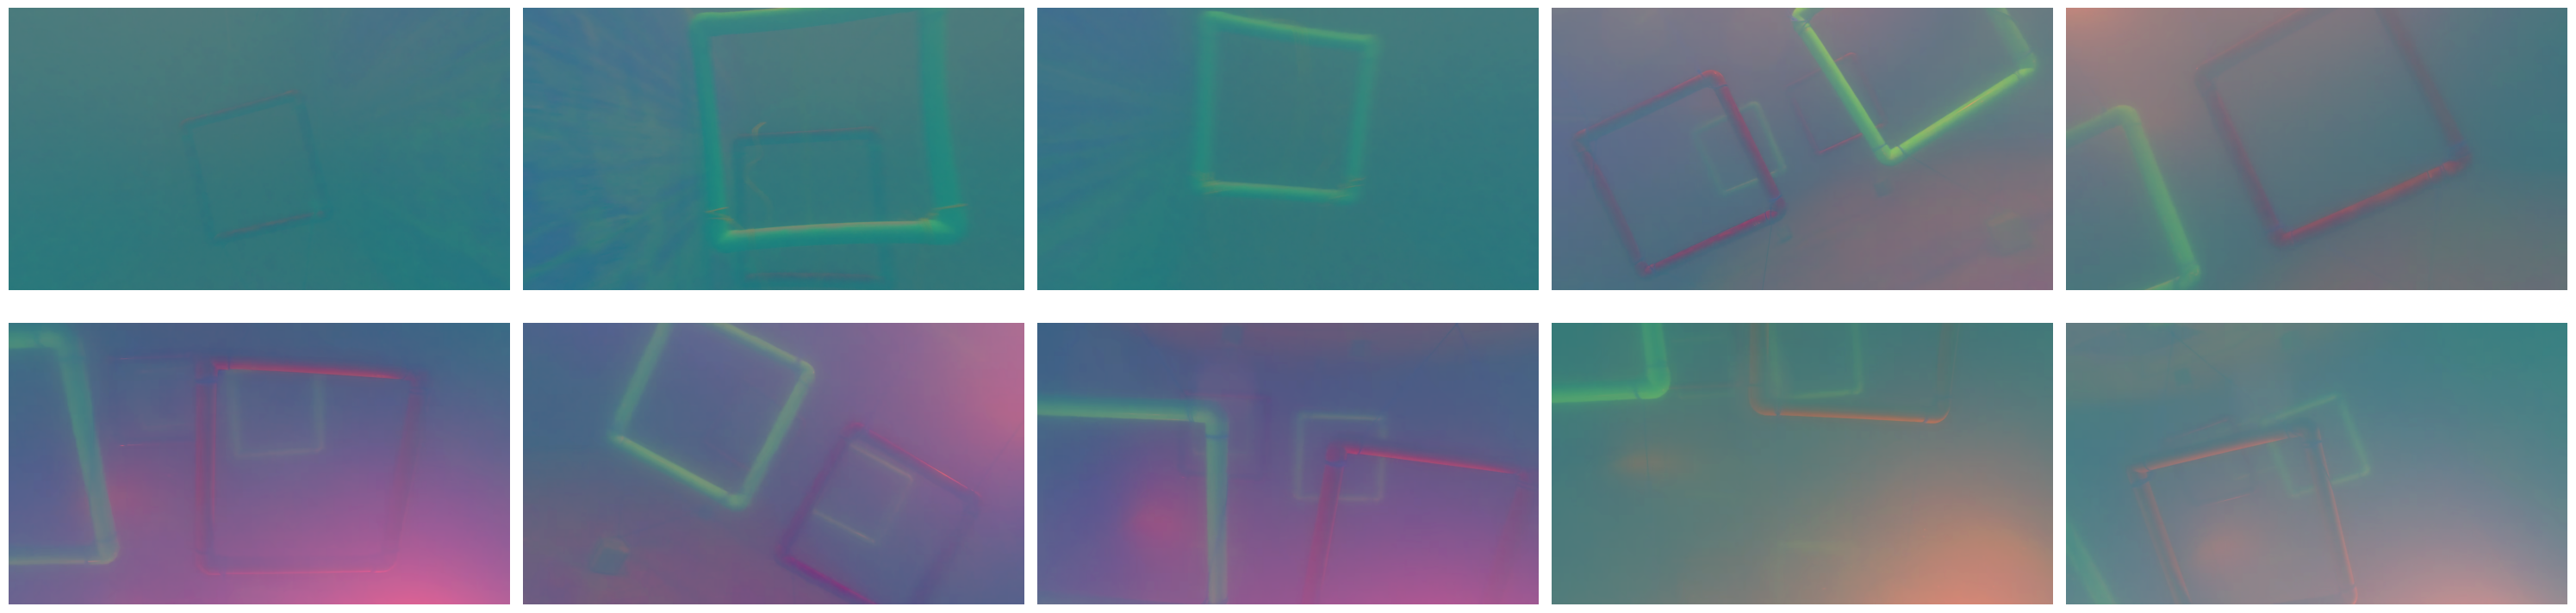

In [20]:
display_images_from_folder(file_paths, format='YCrCb')

In [35]:
# Load YCrCb channels
channels_ycrcb = get_image_channels(file_paths, format='YCrCb')

def show_weighted_images_ycrcb(Y_w, Cr_w, Cb_w):
    clear_output(wait=True)

    rows, cols = 1, 2
    plt.figure(figsize=(50, 20))  # increase width and height

    for i, item in enumerate(channels_ycrcb[:rows * cols]):
        Y = item['channels']['Y'].astype(np.float32)
        Cr = item['channels']['Cr'].astype(np.float32)
        Cb = item['channels']['Cb'].astype(np.float32)

        # Weighted 3-channel image
        ycrcb_weighted = np.stack([
            np.clip(Y_w * Y, 0, 255),
            np.clip(Cr_w * Cr, 0, 255),
            np.clip(Cb_w * Cb, 0, 255)
        ], axis=-1).astype(np.uint8)

        # Convert back to RGB for visualization
        rgb_from_ycrcb = cv2.cvtColor(ycrcb_weighted, cv2.COLOR_YCrCb2RGB)

        # Left: YCrCb weighted visualization
        plt.subplot(rows, cols * 2, 2 * i + 1)
        plt.imshow(rgb_from_ycrcb)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Interactive sliders
widgets.interact(
    show_weighted_images_ycrcb,
    Y_w=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.0),
    Cr_w=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.0),
    Cb_w=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.0)
)


interactive(children=(FloatSlider(value=1.0, description='Y_w', max=3.0, step=0.01), FloatSlider(value=1.0, de…

<function __main__.show_weighted_images_ycrcb(Y_w, Cr_w, Cb_w)>

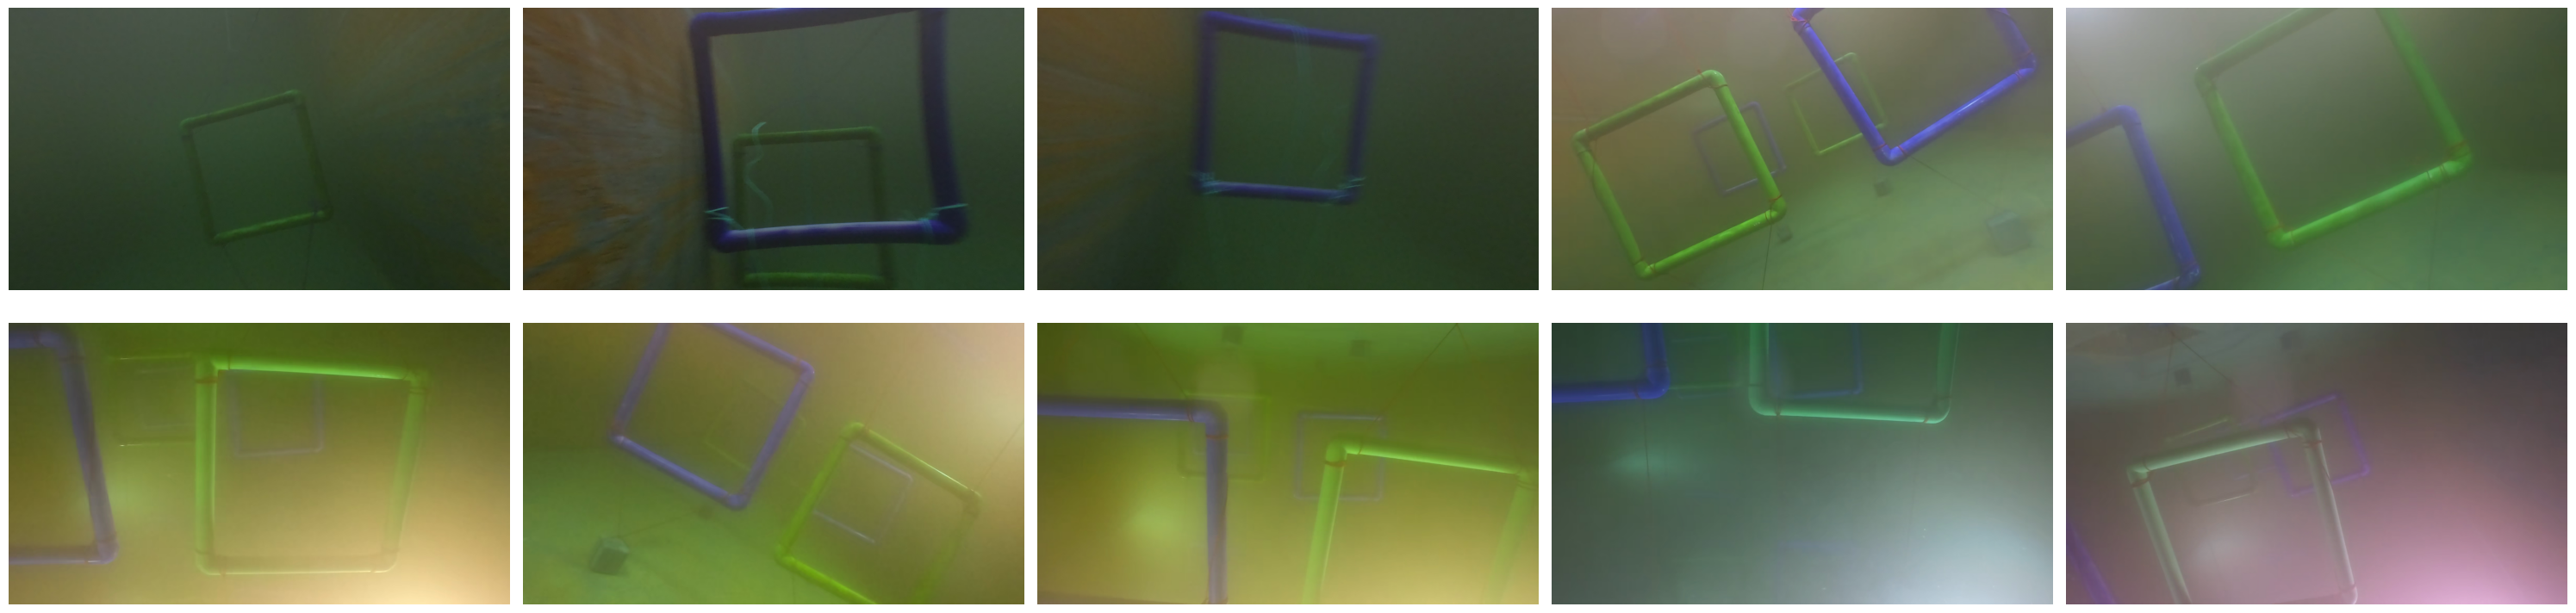

In [21]:
display_images_from_folder(file_paths, format='luv')

In [43]:
# Load LUV channels
channels_luv = get_image_channels(file_paths, format='luv')

def show_weighted_images_luv(L_w, U_w, V_w):
    clear_output(wait=True)

    rows, cols = 1, 2
    plt.figure(figsize=(50, 20))  # increase width and height

    for i, item in enumerate(channels_luv[:rows * cols]):
        L = item['channels']['L'].astype(np.float32)
        U = item['channels']['U'].astype(np.float32)
        V = item['channels']['V'].astype(np.float32)

        # Weighted 3-channel image
        luv_weighted = np.stack([
            np.clip(L_w * L, 0, 255),
            np.clip(U_w * U, 0, 255),
            np.clip(V_w * V, 0, 255)
        ], axis=-1).astype(np.uint8)

        # Convert back to RGB for visualization
        print(luv_weighted[0])
        rgb_from_luv = cv2.cvtColor(luv_weighted, cv2.COLOR_Luv2RGB)

        # Left: LUV weighted visualization
        plt.subplot(rows, cols * 2, 2 * i + 1)
        plt.imshow(luv_weighted)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Interactive sliders
widgets.interact(
    show_weighted_images_luv,
    L_w=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.0),
    U_w=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.0),
    V_w=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.0)
)


interactive(children=(FloatSlider(value=1.0, description='L_w', max=3.0, step=0.01), FloatSlider(value=1.0, de…

<function __main__.show_weighted_images_luv(L_w, U_w, V_w)>

In [45]:
channels_luv = get_image_channels(file_paths, format='luv')
print(channels_luv)

[{'path': '/Users/mohammadbilal/Documents/Projects/GateDetection/assets/test_files/test_images/1169.png', 'channels': {'L': array([[84, 84, 84, ..., 76, 76, 76],
       [84, 84, 84, ..., 76, 76, 76],
       [84, 84, 84, ..., 76, 76, 76],
       ...,
       [46, 46, 47, ..., 39, 39, 39],
       [48, 47, 47, ..., 41, 41, 41],
       [48, 48, 48, ..., 42, 42, 42]], shape=(2988, 5312), dtype=uint8), 'U': array([[93, 93, 93, ..., 89, 89, 89],
       [93, 93, 93, ..., 89, 89, 89],
       [93, 93, 93, ..., 89, 89, 89],
       ...,
       [92, 92, 91, ..., 91, 91, 91],
       [92, 92, 91, ..., 90, 90, 90],
       [92, 92, 91, ..., 90, 90, 90]], shape=(2988, 5312), dtype=uint8), 'V': array([[142, 142, 142, ..., 138, 138, 138],
       [142, 142, 142, ..., 138, 138, 138],
       [142, 142, 142, ..., 138, 138, 138],
       ...,
       [143, 143, 144, ..., 139, 139, 139],
       [147, 147, 148, ..., 141, 141, 141],
       [147, 147, 148, ..., 141, 141, 141]],
      shape=(2988, 5312), dtype=uint8)}